# Complex Questions

## Is there a particular element that leads to more wins?

In [6]:
!pip install rfpimp

     |████████████████████████████████| 148 kB 8.1 MB/s eta 0:00:01
  Created wheel for rfpimp: filename=rfpimp-1.3.5-py3-none-any.whl size=10257 sha256=e45e47becdd5bb035515e3014645c2246ed17deaba0a9ddebe6217063bb881bc
  Stored in directory: /Users/iainmiller/Library/Caches/pip/wheels/15/88/ae/4e8850abc5088fd7e50cc7f869450d6085a0ec6d245adf8874
  Created wheel for stratx: filename=stratx-0.3-py3-none-any.whl size=22698 sha256=3700930903255605e7f37bf5338f82cd7969df37d1254fe7dac6172c0f953dbd
  Stored in directory: /Users/iainmiller/Library/Caches/pip/wheels/f5/79/4f/4eee9c66cb2bf45e2067aa527c9bde3938f58e414ffdb213ec
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=7bef5df340873eabfbcb3bd02c6fa1739561ee3dce8d48c3eedc814ff5509bfe
  Stored in directory: /Users/iainmiller/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built rfpimp stratx sklearn


In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
import rfpimp

/Users/iainmiller/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("../data/stacked_challenger_stats.csv")

/Users/iainmiller/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,gameId,gameDuraton,Wins,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,...,ChampionDamageDealt,TotalGold,TotalMinionKills,TotalLevel,AvgLevel,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt,Colour
0,0,4247155821,1317,1,0,0,0,1,0,2,...,60243,41072,531,63,12.6,111,3,26397,45303,blue
1,1,4241538868,2344,1,1,1,1,1,1,2,...,134826,74955,831,83,16.6,252,5,37161,95287,blue
2,2,4241394461,1567,1,1,1,0,0,1,2,...,59839,52221,576,66,13.2,171,9,40925,51855,blue
3,3,4233113995,1588,1,1,1,1,0,1,2,...,102449,59163,613,71,14.2,157,7,28612,67404,blue
4,4,4231100932,1618,1,1,1,1,0,1,3,...,77245,57940,704,71,14.2,144,5,29726,66468,blue


In [24]:
X = df.drop(["Wins","Colour", "Unnamed: 0"], axis=1)
y = df["Wins"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
rfc = RandomForestClassifier()
rfc_scores = cross_validate(rfc, X_train, y_train.values.ravel(), cv=5, scoring=('accuracy', 'average_precision', 'recall', 'f1'))

In [27]:
rfc_scores

{'fit_time': array([5.84678292, 5.6160171 , 5.81876087, 5.66323304, 5.72821116]),
 'score_time': array([0.21726918, 0.23369718, 0.22514582, 0.22353101, 0.21408987]),
 'test_accuracy': array([0.97212592, 0.97004161, 0.97142857, 0.97572816, 0.97586685]),
 'test_average_precision': array([0.99631555, 0.99576442, 0.9960042 , 0.99574032, 0.99597891]),
 'test_recall': array([0.97751249, 0.98223209, 0.98223209, 0.98528595, 0.98195447]),
 'test_f1': array([0.97224907, 0.9703785 , 0.97171107, 0.9759384 , 0.97599338])}

In [28]:
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

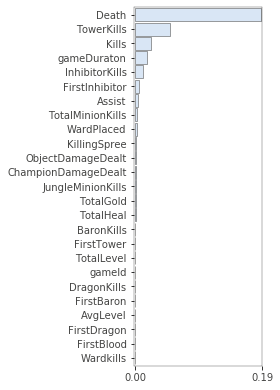

In [31]:
importance = rfpimp.importances(rfc, X_train, y_train)
rfpimp.plot_importances(importance).save("../reports/image/lol-challenger-rfpimp-importances.png")

In [32]:
y.value_counts()

1    26904
0    26904
Name: Wins, dtype: int64

In [33]:
import pickle

In [35]:
pickle.dump(rfc, open("../models/lol-challenger-rfc.sav", 'wb'))

## Given stats for a team can you predict whether it won or not?

Using the model created above what are its learning metrics

In [36]:
y_pred = rfc.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.9754463028664752

In [38]:
precision_score(y_test, y_pred)

0.9686391843971631

In [39]:
recall_score(y_test, y_pred)

0.9827973914998875

In [40]:
f1_score(y_test, y_pred)

0.9756669271124009

## What are the differences in the above between Challengers, Masters and Grand Masters?

In [41]:
def genRFCModel(df,imp_file,model_file):
    X = df.drop(["Wins","Colour", "Unnamed: 0"], axis=1)
    y = df["Wins"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    rfc = RandomForestClassifier()
    rfc_scores = cross_validate(rfc, X_train, y_train.values.ravel(), cv=5, scoring=('accuracy', 'average_precision', 'recall', 'f1'))
    
    print(rfc_scores)
    
    rfc.fit(X_train, y_train.values.ravel())
    
    importance = rfpimp.importances(rfc, X_train, y_train)
    rfpimp.plot_importances(importance).save(imp_file)
    
    pickle.dump(rfc, open(model_file, 'wb'))
    
    y_pred = rfc.predict(X_test)
    
    print("Accuracy: {}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision: {}\n".format(precision_score(y_test, y_pred)))
    print("Recall: {}\n".format(recall_score(y_test, y_pred)))
    print("F1: {}\n".format(f1_score(y_test, y_pred)))
    
    return rfc

/Users/iainmiller/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{'fit_time': array([29.8034749 , 30.27217197, 29.43843389, 29.49908996, 29.35111594]), 'score_time': array([1.35246205, 1.197299  , 1.19861507, 1.18941903, 1.21009421]), 'test_accuracy': array([0.97460815, 0.97425984, 0.97457243, 0.97478143, 0.97377129]), 'test_average_precision': array([0.99669913, 0.99638059, 0.9963578 , 0.99618882, 0.99607014]), 'test_recall': array([0.97873819, 0.98123958, 0.98089083, 0.98089083, 0.9822111 ]), 'test_f1': array([0.97477596, 0.97450229, 0.97479456, 0.97499655, 0.97405506])}
Accuracy: 0.9745838224686364

Precision: 0.9687596572552325

Recall: 0.9805220655141037

F1: 0.97460537286435



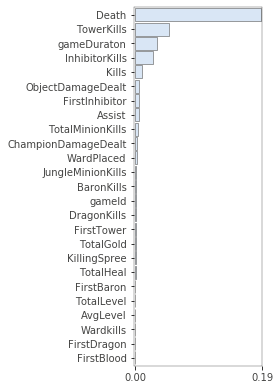

In [44]:
smf = pd.read_csv("../data/stacked_master_stats.csv")
rfc_master = genRFCModel(smf, "../reports/image/lol-master-rfpimp-importance.png", "../models/lol-master-rfc.sav")

/Users/iainmiller/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{'fit_time': array([31.45078397, 31.89958191, 31.01685691, 29.70818591, 29.40541911]), 'score_time': array([1.22136712, 1.19108605, 1.20420289, 1.185462  , 1.19124293]), 'test_accuracy': array([0.97495646, 0.97429467, 0.97467693, 0.97398028, 0.97377129]), 'test_average_precision': array([0.99664339, 0.99646599, 0.99632183, 0.9959434 , 0.99615314]), 'test_recall': array([0.97839077, 0.9807532 , 0.98102981, 0.97998749, 0.9816552 ]), 'test_f1': array([0.97510474, 0.97452361, 0.97489901, 0.97419956, 0.97404075])}
Accuracy: 0.9743009490403519

Precision: 0.9689266331093052

Recall: 0.97975432211101

F1: 0.9743103960186063



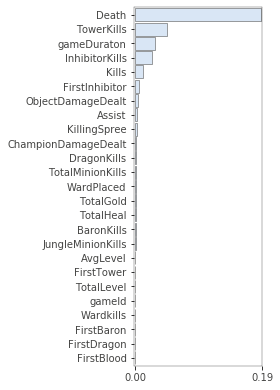

In [45]:
sgmf = pd.read_csv("../data/stacked_grandmaster_stats.csv")
rfc_grandmaster = genRFCModel(smf, "../reports/image/lol-grandmaster-rfpimp-importance.png", "../models/lol-grandmaster-rfc.sav")

In [48]:
df_chal_noDK = df.drop(["Death", "Kills"], axis=1)
df_chal_noDK.columns

Index(['Unnamed: 0', 'gameId', 'gameDuraton', 'Wins', 'FirstBlood',
       'FirstTower', 'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills', 'InhibitorKills',
       'WardPlaced', 'Wardkills', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel', 'JungleMinionKills',
       'KillingSpree', 'TotalHeal', 'ObjectDamageDealt', 'Colour'],
      dtype='object')

{'fit_time': array([5.36312699, 5.09152985, 5.23260593, 5.30483699, 5.32610726]), 'score_time': array([0.24992704, 0.25719619, 0.25197387, 0.26682496, 0.2708919 ]), 'test_accuracy': array([0.96186382, 0.95395284, 0.96033287, 0.96102635, 0.95852982]), 'test_average_precision': array([0.99121159, 0.98977295, 0.99119192, 0.99244987, 0.99224274]), 'test_recall': array([0.96529706, 0.96529706, 0.96862854, 0.97029428, 0.96557468]), 'test_f1': array([0.96195878, 0.95443316, 0.96062775, 0.96135332, 0.95878704])}
Accuracy: 0.9611984006307371

Precision: 0.9550748752079867

Recall: 0.9680683606926017

F1: 0.9615277234909821



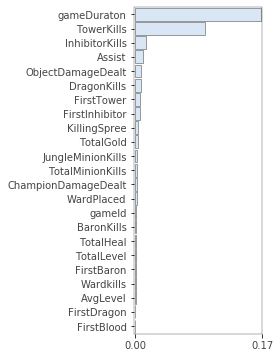

In [49]:
rfc_chal_noDK = genRFCModel(df_chal_noDK, "../reports/image/lol-challenger-noDK-rfpimp-importance.png", "../models/lol-challenger-noDK-rfc.sav")

In [50]:
 df_mast_noDK = smf.drop(["Death", "Kills"], axis=1)

{'fit_time': array([27.32085299, 27.79908729, 26.12259984, 26.96678591, 25.707371  ]), 'score_time': array([1.40603709, 1.36383677, 1.40413594, 1.33910298, 1.33489299]), 'test_accuracy': array([0.96374086, 0.96238245, 0.96286879, 0.96300812, 0.96175415]), 'test_average_precision': array([0.99336704, 0.99225391, 0.99252191, 0.99221405, 0.99222836]), 'test_recall': array([0.96789883, 0.96824625, 0.9696338 , 0.97109304, 0.97046765]), 'test_f1': array([0.96398049, 0.9626943 , 0.96320839, 0.96339446, 0.96217706])}
Accuracy: 0.9623636903667454

Precision: 0.9564179607424672

Recall: 0.9684656505914467

F1: 0.9624041029118805



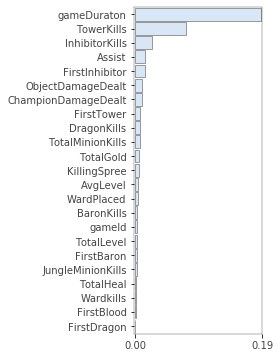

In [51]:
rfc_mast_noDK = genRFCModel(df_mast_noDK, "../reports/image/lol-master-noDK-rfpimp-importance.png", "../models/lol-master-noDK-rfc.sav")

In [52]:
df_grand_noDK = sgmf.drop(["Death", "Kills"], axis=1)

{'fit_time': array([15.70299387, 15.34597397, 16.00373507, 16.208745  , 14.93144703]), 'score_time': array([0.76437306, 0.83869529, 0.77450871, 0.79249024, 0.78476787]), 'test_accuracy': array([0.96177803, 0.96279728, 0.96177803, 0.96121178, 0.96070215]), 'test_average_precision': array([0.9915243 , 0.99221079, 0.99132817, 0.9920691 , 0.99206344]), 'test_recall': array([0.96687089, 0.97005105, 0.97005105, 0.96948383, 0.9659671 ]), 'test_f1': array([0.9619053 , 0.96300467, 0.96202959, 0.96146706, 0.96084405])}
Accuracy: 0.9623379012232135

Precision: 0.9579778544200399

Recall: 0.967372376500779

F1: 0.9626521957225592



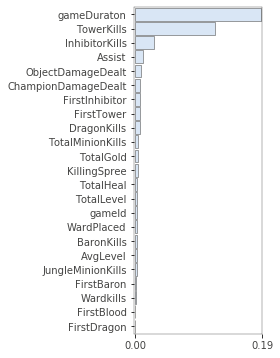

In [53]:
rfc_grand_noDK = genRFCModel(df_grand_noDK, "../reports/image/lol-grandmaster-noDK-rfpimp-importance.png", "../models/lol-grandmaster-noDK-rfc.sav")

In [59]:
def getPredStats(model,df,rowname):
    X = df.drop(["Wins","Colour", "Unnamed: 0"], axis=1)
    y = df["Wins"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
        
    y_pred = rfc.predict(X_test)
    
    print("Accuracy: {}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision: {}\n".format(precision_score(y_test, y_pred)))
    print("Recall: {}\n".format(recall_score(y_test, y_pred)))
    print("F1: {}\n".format(f1_score(y_test, y_pred)))
    
    print("| {} | {} | {} | {} | {} |\n".format(rowname, accuracy_score(y_test, y_pred), 
                                               precision_score(y_test, y_pred),
                                                recall_score(y_test, y_pred),
                                               f1_score(y_test, y_pred)))

In [60]:
getPredStats(rfc_chal_noDK, df_mast_noDK, "C to M")

ValueError: Number of features of the model must match the input. Model n_features is 25 and input n_features is 23 

In [56]:
print(df_chal_noDK.shape)
print(df_mast_noDK.shape)
print(df_grand_noDK.shape)

(53808, 26)
(214250, 26)
(131792, 26)
